# Deep learning for facial emotion recognition
## Convolutional Neural Networks

- A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. 
- The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.
- A ConvNet is able to successfully capture the Spatial and Temporal dependencies in an image through the application of relevant filters.
- The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image.

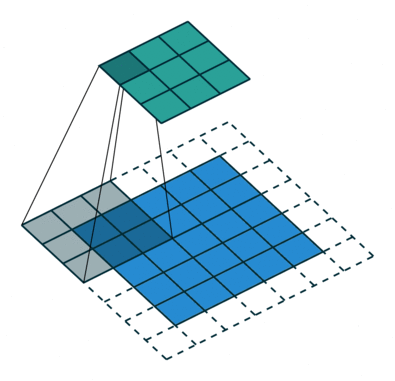

- There are various architectures of CNNs available which have been key in building algorithms which power and shall power AI as a whole in the foreseeable future. Some of them have been listed below:
1. LeNet
2. AlexNet
3. VGGNet
4. GoogLeNet
5. ResNet
6. ZFNet

In [ ]:
#Imports
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_arr = cv2.imread("/content/drive/MyDrive/Affectnet dataset/train_class/1/image0000002.jpg")

In [ ]:
print(img_arr)

[[[119 124 139]
  [118 123 138]
  [117 121 139]
  ...
  [  6   4   4]
  [  6   4   3]
  [ 19  18  14]]

 [[114 119 134]
  [114 119 134]
  [114 118 136]
  ...
  [  5   3   3]
  [  6   4   3]
  [ 17  16  12]]

 [[115 120 135]
  [115 120 135]
  [115 120 135]
  ...
  [  5   3   3]
  [  5   3   2]
  [ 14  13   9]]

 ...

 [[ 67  48  11]
  [ 73  53  18]
  [ 77  58  25]
  ...
  [ 35  40  39]
  [ 34  39  38]
  [ 34  38  39]]

 [[ 72  52  11]
  [ 78  57  19]
  [ 79  60  23]
  ...
  [ 34  39  38]
  [ 33  38  37]
  [ 32  36  37]]

 [[ 78  59  16]
  [ 79  60  17]
  [ 71  53  12]
  ...
  [ 34  38  39]
  [ 33  37  38]
  [ 31  36  37]]]


In [ ]:
img_arr.shape

(177, 177, 3)

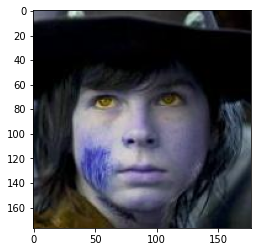

In [ ]:
plt.imshow(img_arr)

In [ ]:
DataDirectory = "/content/drive/MyDrive/Affectnet dataset/train_class"

In [ ]:
classes = ['1','2','3']

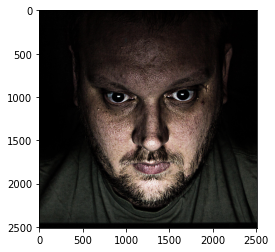

In [ ]:
for category in classes:
  path = os.path.join(DataDirectory,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break


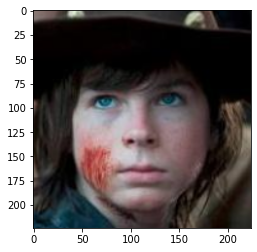

In [ ]:
img_size = 224
new_array = cv2.resize(img_arr, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
new_array.shape

(224, 224, 3)

In [ ]:
training_data = []

#Preprocessing
def create_training_data():
  for category in classes:
    path = os.path.join(DataDirectory,category)
    class_num = classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
 

In [ ]:
create_training_data()

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
X = []
y = []

for features,label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3)

In [ ]:
X.shape

(3042, 224, 224, 3)

In [ ]:
X = X/255.0

In [ ]:
for i in range(100):
  print(y[i])

1
1
2
1
0
2
0
1
1
0
1
2
2
1
1
1
1
1
1
1
0
0
2
2
0
1
2
1
0
2
0
1
1
0
2
0
1
1
1
2
1
1
1
1
1
0
1
1
2
1
2
0
0
0
1
2
2
1
1
2
0
2
2
1
2
1
2
2
2
1
0
1
1
2
2
0
1
1
0
2
2
0
2
0
2
1
2
0
1
2
1
0
2
1
1
1
2
2
2
2


In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

## MobileNet CNN algorithm
- Mobilenet is a model which does the same convolution as done by CNN to filter images but in a different way than those done by the previous CNN.
- It uses the idea of Depth convolution and point convolution which is different from the normal convolution as done by normal CNNs.
- This increases the efficiency of CNN to predict images and hence they can be able to compete in the mobile systems as well. Since these ways of convolution reduce the comparison and recognition time a lot, so it provides a better response in a very short time and hence we are using them as our emotion recognition model.

In [ ]:
#Model training and accuracy verification
model = tf.keras.applications.MobileNetV2()

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(3 ,activation = 'softmax')(final_output) 

In [ ]:
final_output

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_5')>

In [ ]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [ ]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
new_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ["accuracy"])

In [ ]:
type(y)

list

In [ ]:
Y = np.array(y)

In [ ]:
Y.shape

(3042,)

In [ ]:
new_model.fit(X,Y,epochs = 8)

Epoch 1/8
96/96 [==============================] - 597s 6s/step - loss: 0.8113 - accuracy: 0.6111
Epoch 2/8
96/96 [==============================] - 599s 6s/step - loss: 0.6222 - accuracy: 0.7226
Epoch 3/8
96/96 [==============================] - 598s 6s/step - loss: 0.5230 - accuracy: 0.7699
Epoch 4/8
96/96 [==============================] - 593s 6s/step - loss: 0.4529 - accuracy: 0.8176
Epoch 5/8
96/96 [==============================] - 585s 6s/step - loss: 0.5637 - accuracy: 0.7666
Epoch 6/8
96/96 [==============================] - 587s 6s/step - loss: 0.3697 - accuracy: 0.8531
Epoch 7/8
96/96 [==============================] - 590s 6s/step - loss: 0.2779 - accuracy: 0.8945
Epoch 8/8
96/96 [==============================] - 593s 6s/step - loss: 0.2578 - accuracy: 0.9050


In [ ]:
new_model.save("elon_musk_amar_rahe.h5")

In [ ]:
frame = cv2.imread("/content/drive/MyDrive/Affectnet/val_class/class001/image0000361.jpg")

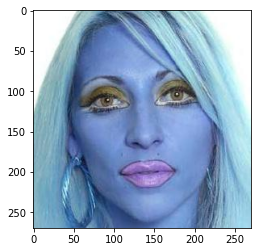

In [ ]:
plt.imshow(frame)

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(270, 270)

# Facial Recognition  
## Haarcascade
-  It is an Object Detection Algorithm used to identify faces in an image or a real time video.
- The algorithm uses edge or line detection features proposed by Viola and Jones in their research paper “Rapid Object Detection using a Boosted Cascade of Simple Features” published in 2001.

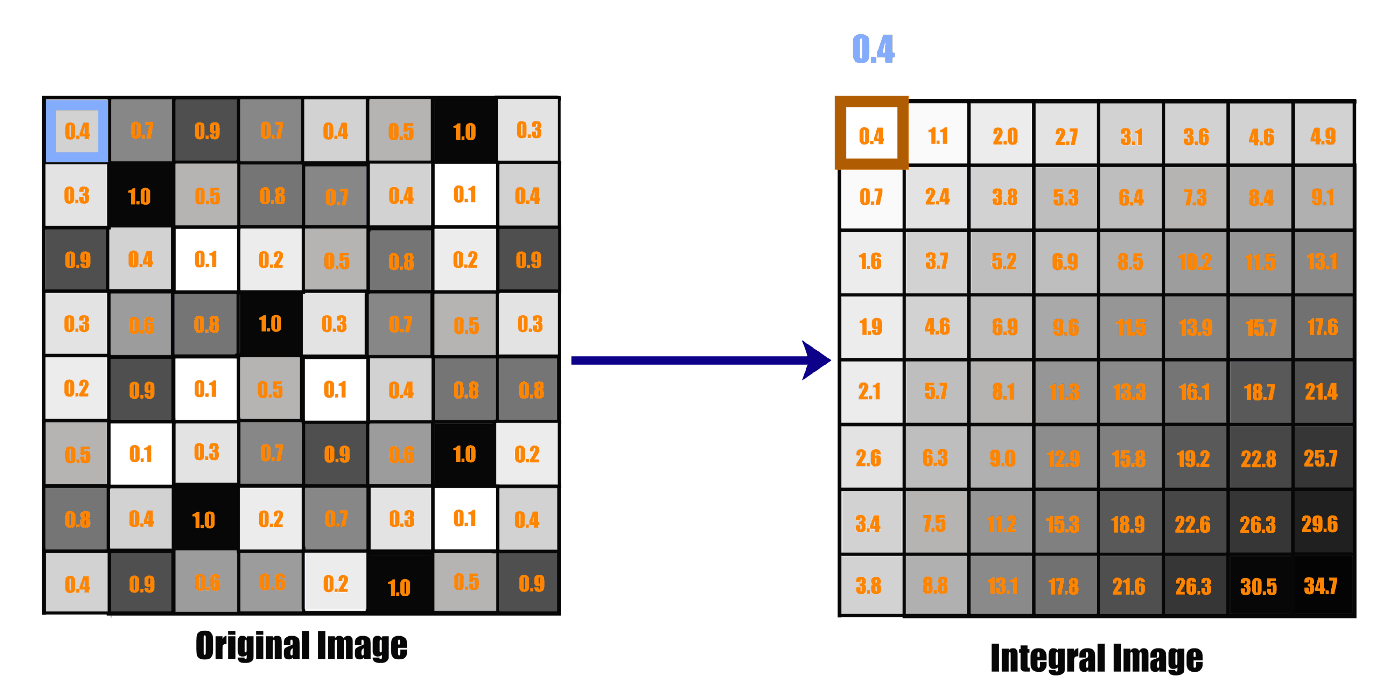

- Haar Cascade Detection is one of the oldest yet powerful face detection algorithms invented. It has been there since long, long before Deep Learning became famous. Haar Features were not only used to detect faces, but also for eyes, lips, license number plates etc.

In [ ]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h,x:x+w]
  roi_color = frame[y:y+h,x:x+w]
  cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(facess) == 0:
    print("Face not detected")
  else:
    for (ex,ey,ew,eh) in facess:
      face_roi = roi_color[ey:(ey+eh),ex:(ex+eh)]

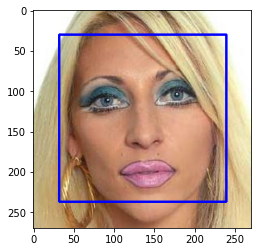

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

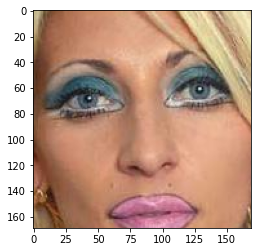

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [ ]:
img_size = 224
final_image = cv2.resize(face_roi,(img_size,img_size))
final_image = np.expand_dims(final_image,axis= 0)
final_image = final_image/255.0

In [ ]:
final_image.shape

(1, 224, 224, 3)

In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
Predictions[0]

array([9.99893069e-01, 7.21899141e-07, 1.06255895e-04], dtype=float32)

In [ ]:
np.argmax(Predictions[0])

0